In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df  = pd.read_csv("D:\Python Preparatory\Assignment\Capstone Project\Census-Income Project\census-income.csv")

In [3]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
                   0
dtype: int64

# 2. Data Manipulation:  

In [4]:
census_ed = df[[' education']]

In [5]:
census_seq= df.iloc[0:,0:8]

In [6]:
census_col = df.iloc[0:,[5,8,11]]

In [7]:
df[' sex'].unique()

array([' Male', ' Female'], dtype=object)

In [8]:
df[' workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
male_gov = df.loc[(df[' workclass'] == ' State-gov') & 
              (df[' sex']==" Male")]

In [10]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
df1 = df[df['age'] == 39]
census_us = df1.loc[(df1[' education']== ' Bachelors') | (df1[' native-country']== ' United-States')]

In [12]:
census_200 = df.sample(200)

In [13]:
df[' workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

In [14]:
df.groupby(' workclass')[' capital-gain'].mean()

 workclass
 ?                    606.795752
 Federal-gov          833.232292
 Local-gov            880.202580
 Never-worked           0.000000
 Private              889.217792
 Self-emp-inc        4875.693548
 Self-emp-not-inc    1886.061787
 State-gov            701.699538
 Without-pay          487.857143
Name:  capital-gain, dtype: float64

In [15]:
df[' ']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name:  , Length: 32561, dtype: object

In [16]:
df.rename(columns = {' ':'income'}, inplace = True)

In [17]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [18]:
df2 = df[df['income'] == ' >50K']

In [19]:
a = len(df[(df[' workclass'] == ' Private') & (df['income'] == ' <=50K' ) & (df[' native-country'] == ' United-States')])
b = len(df)
c = (a/b)*100
print(f'percentage of people from the United States who are private employees and earn less than 50,000 annually are {c}')

percentage of people from the United States who are private employees and earn less than 50,000 annually are 47.891649519363654


In [20]:
df[' marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [21]:
d = len(df.loc[(df[' marital-status'].isin([' Married-civ-spouse',
                                    ' Married-spouse-absent',
                                    ' Married-AF-spouse',]))])
e = (d/b)*100
print(f'percentage of married people in the census data are {e}')

percentage of married people in the census data are 47.34805442093302


In [22]:
f = len(df[(df[' education'] == ' HS-grad') & (df['income'] == ' >50K' )])
g = (f/b)*100
print(f'percentage of high school graduates earning more than 50,000 annually are {g}')

percentage of high school graduates earning more than 50,000 annually are 5.144190903227788


# Linear Regression

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       'income'],
      dtype='object')

In [25]:
x = df[' education-num'].values.reshape(-1,1)
y = df[' hours-per-week'].values.reshape(-1,1)

In [26]:
x_train , x_test , y_train , y_test = train_test_split(x, y, train_size = 0.7 , random_state = 7 )

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred = reg.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns = ['Predicted'])


In [29]:
y_pred

,Predicted
0,40.346331
1,42.477033
2,40.346331
3,38.925863
4,42.477033
...,...
9764,39.636097
9765,42.477033
9766,42.477033
9767,38.215629


In [30]:
from sklearn import metrics

In [31]:
metrics.mean_absolute_error(y_test ,y_pred )

7.564304398936128

In [32]:
metrics.mean_squared_error(y_test ,y_pred )

144.94894811554494

In [33]:
np.sqrt(metrics.mean_absolute_error(y_test ,y_pred ))

2.750328052966796

In [34]:
from sklearn.metrics import r2_score

In [35]:
 r2_score(y_test, y_pred)

0.021733433749792308

# Logistic Regression

a) Simple logistic regression 

In [36]:
categorical_features = list(df.select_dtypes(include=['object']).columns)
print(categorical_features)

[' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country', 'income']


In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [38]:
for i in categorical_features:
    df[i] = le.fit_transform(df[i])

In [39]:
xl =  df[[' occupation']]
yl = df['income']

In [40]:
from sklearn.model_selection import train_test_split
xl_train , xl_test , yl_train , yl_test = train_test_split(xl, yl, train_size = 0.80 , random_state = 2 )

In [41]:
 print(xl_train.shape,yl_train.shape, xl_test.shape, yl_test.shape)

(26048, 1) (26048,) (6513, 1) (6513,)


In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xl_train,yl_train)

LogisticRegression()

In [43]:
ypred = logreg.predict(xl_test)
yl_pred = pd.DataFrame(ypred)

In [44]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [45]:
confusion_matrix(yl_test,yl_pred)

array([[4928,    0],
       [1585,    0]], dtype=int64)

In [46]:
accuracy_score(yl_test,yl_pred)

0.7566405650237985

In [47]:
from sklearn.metrics import classification_report
print(classification_report(yl_test,yl_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4928
           1       0.00      0.00      0.00      1585

    accuracy                           0.76      6513
   macro avg       0.38      0.50      0.43      6513
weighted avg       0.57      0.76      0.65      6513



C:\Users\PRINCE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRINCE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRINCE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


b) Multiple logistic regression model 

In [48]:
x2 = df[['age', ' workclass',' education']]

In [49]:
y2 =  df['income']

In [50]:
from sklearn.model_selection import train_test_split
x2_train , x2_test , y2_train , y2_test = train_test_split(x2, y2, train_size = 0.80 , random_state = 6 )

In [51]:
logreg.fit(x2_train,y2_train)

LogisticRegression()

In [52]:
y2_pred = logreg.predict(x2_test)
y2_pred = pd.DataFrame(y2_pred)

In [53]:
y2_pred.value_counts()

0    6347
1     166
dtype: int64

In [54]:
confusion_matrix(y2_test,y2_pred)

array([[4852,  123],
       [1495,   43]], dtype=int64)

In [55]:
accuracy_score(y2_test,y2_pred)

0.7515737755258713

# 5. Decision Tree

In [56]:
x3 = df[['age', ' workclass', ' fnlwgt', ' education', ' education-num',' marital-status', ' occupation', ' relationship', ' race', ' sex', ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country']]

In [57]:
y3 = df['income']

In [58]:
from sklearn.model_selection import train_test_split
x3_train , x3_test , y3_train , y3_test = train_test_split(x3, y3, train_size = 0.70 , random_state = 5 )

In [59]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor()
dtreg.fit(x3_train,y3_train)

DecisionTreeRegressor()

In [60]:
ypred_dt = dtreg.predict(x3_test)
y_predicted = pd.DataFrame(ypred_dt)

In [61]:
y_predicted.value_counts()

0.0    7425
1.0    2344
dtype: int64

In [62]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [63]:
confusion_matrix(y3_test,y_predicted)

array([[6509,  918],
       [ 916, 1426]], dtype=int64)

In [64]:
accuracy_score(y3_test,y_predicted)

0.8122632818098066

# Random Forest

In [65]:
x4 = df[['age', ' workclass', ' fnlwgt', ' education', ' education-num',' marital-status', ' occupation', ' relationship', ' race', ' sex', ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country']]
y4 = df['income']

In [66]:
from sklearn.model_selection import train_test_split
x4_train , x4_test , y4_train , y4_test = train_test_split(x4, y4, train_size = 0.80 , random_state = 6 )

In [67]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 300)
clf.fit(x4_train,y4_train)

RandomForestClassifier(n_estimators=300)

In [68]:
yrf = clf.predict(x4_test)
y_pred_rf = pd.DataFrame(yrf)

In [69]:
y_pred_rf.value_counts()

0    5201
1    1312
dtype: int64

In [70]:
confusion_matrix(y4_test,y_pred_rf)

array([[4636,  339],
       [ 565,  973]], dtype=int64)

In [71]:
accuracy_score(y4_test,y_pred_rf)

0.861200675571933

# 7. For this problem, use the population dataset, and perform the following:
1.	EDA on the time series to find trends and seasonality.
2.	Forecast the population on the given dataset for the next 6 months. 



In [72]:
popdf = pd.read_csv("D:\Python Preparatory\Assignment\Capstone Project\Census-Income Project\popdata.csv", index_col = 'date', parse_dates = True)

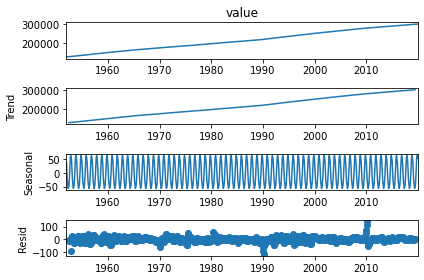

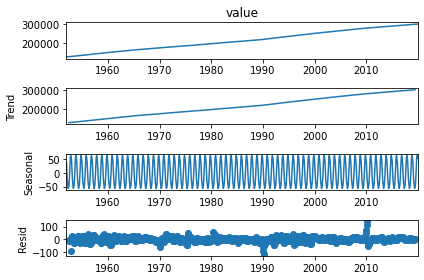

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(popdf['value'],model ='additive')

result.plot()

In [74]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(popdf['value'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   
                          suppress_warnings = True, 
                          stepwise = True)    


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=6634.283, Time=2.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7298.385, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6936.414, Time=0.57 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=7090.034, Time=0.71 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=6948.478, Time=0.32 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=6634.632, Time=3.71 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=6634.676, Time=4.81 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=6788.602, Time=0.90 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=6636.590, Time=10.01 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=6853.184, Time=0.86 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=6636.276, Time=2.93 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=6636.277, Time=3.13 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=7283.432, Time=0.52 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=6978.741, Time=0.88 sec
 ARIMA(2,1,0)(0,1,

In [75]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  816
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -3313.142
Date:                            Wed, 25 May 2022   AIC                           6634.283
Time:                                    15:00:40   BIC                           6653.037
Sample:                                         0   HQIC                          6641.486
                                            - 816                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9811      0.010    101.972      0.000       0.962       1.000
ma.L1         -0.6360      0.017    -36.533      0.000      -0.670      -0.602
ma.S.L12      -0.8275      0.016    -51.509      0.000      -0.859      -0.796
sigma2       218.7643      2.259     96.825      0.000     214.336     223.193
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):            174157.69
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -3.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        74.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
train = popdf.iloc[:len(popdf)-12]
test = popdf.iloc[len(popdf)-12:]

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['value'], 
                order = (1, 1, 1), 
                seasonal_order =(0, 1, 1, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  804
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -3269.181
Date:                            Wed, 25 May 2022   AIC                           6546.361
Time:                                    15:00:43   BIC                           6565.054
Sample:                                01-01-1952   HQIC                          6553.546
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9812      0.010    100.710      0.000       0.962       1.000
ma.L1         -0.6360      0.018    -36.077      0.000      -0.671      -0.601
ma.S.L12      -0.8283      0.016    -50.798      0.000      -0.860      -0.796
sigma2       221.7173      2.327     95.280      0.000     217.156     226.278
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):            167436.57
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                            -3.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        73.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
start = len(train)
end = len(train) + len(test) - 1

In [79]:
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

<AxesSubplot:xlabel='date'>

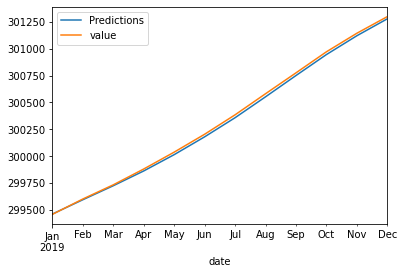

In [80]:
predictions.plot(legend = True)
test['value'].plot(legend = True)

In [81]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

rmse(test["value"], predictions)

21.18775496375448

In [82]:
mean_squared_error(test["value"], predictions)

448.9209604041025

<AxesSubplot:xlabel='date'>

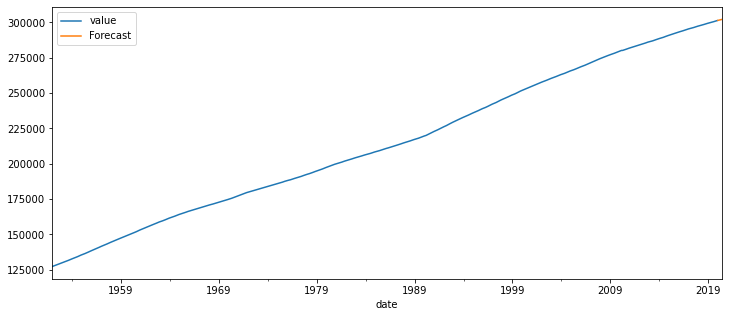

In [84]:
# Train the model on the full dataset
model = model = SARIMAX(popdf['value'], 
                        order = (1, 1, 1), 
                        seasonal_order =(0, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 6 months
forecast = result.predict(start = len(popdf), 
                          end = (len(popdf)-1) + 6, 
                          typ = 'levels').rename('Forecast')
  

popdf['value'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)